## Task 1

In [0]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
from sklearn.model_selection import GridSearchCV
import numpy as np
from keras.optimizers import SGD
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import pandas as pd

In [0]:
iris = sns.load_dataset("iris")

In [0]:
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]
uniques, y_id =np.unique(y, return_inverse =True)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_id, stratify = y, random_state =0)

In [0]:
y_train = np_utils.to_categorical(y_train, len(uniques))
y_test = np_utils.to_categorical(y_test, len(uniques))

In [0]:
model = Sequential()
model.add(Dense(64, input_dim = 4, activation ='relu'))
model.add(Dense(64,activation ='relu'))
model.add(Dense(3,activation='softmax'))
sgd =SGD(lr=0.01, decay =1e-6, momentum =0.9, nesterov =True)

In [0]:
model.compile(loss ='categorical_crossentropy',
             optimizer = sgd,
             metrics =['accuracy'])

In [79]:
model.fit(X_train,y_train, epochs=20, batch_size =128)

Epoch 1/20
112/112 [==============================] - 3s 22ms/step - loss: 1.7332 - acc: 0.1161
Epoch 2/20
112/112 [==============================] - 0s 63us/step - loss: 1.3515 - acc: 0.3393
Epoch 3/20
112/112 [==============================] - 0s 33us/step - loss: 1.1072 - acc: 0.3393
Epoch 4/20
112/112 [==============================] - 0s 32us/step - loss: 1.0668 - acc: 0.3304
Epoch 5/20
112/112 [==============================] - 0s 47us/step - loss: 1.0304 - acc: 0.3304
Epoch 6/20
112/112 [==============================] - 0s 45us/step - loss: 0.9464 - acc: 0.3304
Epoch 7/20
112/112 [==============================] - 0s 45us/step - loss: 0.8653 - acc: 0.7143
Epoch 8/20
112/112 [==============================] - 0s 47us/step - loss: 0.8079 - acc: 0.6696
Epoch 9/20
112/112 [==============================] - 0s 45us/step - loss: 0.7625 - acc: 0.6696
Epoch 10/20
112/112 [==============================] - 0s 49us/step - loss: 0.7206 - acc: 0.6696
Epoch 11/20
112/112 [==================

In [80]:
score = model.evaluate(X_test, y_test, batch_size=128)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

38/38 [==============================] - 1s 28ms/step
Test loss: 0.428
Test Accuracy: 0.895


In [0]:
def make_model(hidden_size =64):
  model =Sequential([
      Dense(hidden_size,input_dim = 4),
      Activation('relu'),
      Dense(hidden_size),
      Activation('relu'),
      Dense(3),
      Activation('softmax'),
  ])
  sgd =SGD(lr=0.01, decay =1e-6, momentum =0.9, nesterov =True)
  model.compile(loss ='categorical_crossentropy',
             optimizer = sgd,
             metrics =['accuracy'])
  return model


In [82]:
clf = KerasClassifier(make_model)
param_grid ={'epochs':[1,5,10],
             'hidden_size':[32, 64, 256]
            }
grid =GridSearchCV(clf,param_grid =param_grid, cv =5)
grid_result = grid.fit(X_train, y_train)

Epoch 1/1
89/89 [==============================] - 0s 130us/step
Epoch 1/1
89/89 [==============================] - 0s 122us/step
Epoch 1/1
90/90 [==============================] - 0s 146us/step
Epoch 1/1
90/90 [==============================] - 0s 157us/step
Epoch 1/1
90/90 [==============================] - 0s 153us/step
Epoch 1/1
89/89 [==============================] - 0s 138us/step
Epoch 1/1
89/89 [==============================] - 0s 130us/step
Epoch 1/1
90/90 [==============================] - 0s 131us/step
Epoch 1/1
90/90 [==============================] - 0s 145us/step
Epoch 1/1
90/90 [==============================] - 0s 142us/step
Epoch 1/1
89/89 [==============================] - 0s 159us/step
Epoch 1/1
89/89 [==============================] - 0s 140us/step
Epoch 1/1
90/90 [==============================] - 0s 139us/step
Epoch 1/1
90/90 [==============================] - 0s 142us/step
Epoch 1/1
90/90 [==============================] - 0s 182us/step
Epoch 1/5
89/89 [========

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/10
112/112 [==============================] - 5s 45ms/step - loss: 1.0534 - acc: 0.3214
Epoch 2/10
112/112 [==============================] - 0s 158us/step - loss: 0.7709 - acc: 0.7054
Epoch 3/10
112/112 [==============================] - 0s 152us/step - loss: 0.6140 - acc: 0.7143
Epoch 4/10
112/112 [==============================] - 0s 155us/step - loss: 0.5019 - acc: 0.7411
Epoch 5/10
112/112 [==============================] - 0s 176us/step - loss: 0.4486 - acc: 0.7589
Epoch 6/10
112/112 [==============================] - 0s 155us/step - loss: 0.4083 - acc: 0.8304
Epoch 7/10
112/112 [==============================] - 0s 149us/step - loss: 0.3914 - acc: 0.7857
Epoch 8/10
112/112 [==============================] - 0s 153us/step - loss: 0.3046 - acc: 0.9464
Epoch 9/10
112/112 [==============================] - 0s 149us/step - loss: 0.2855 - acc: 0.9107
Epoch 10/10
112/112 [==============================] - 0s 160us/step - loss: 0.2739 - acc: 0.9018


In [83]:
res =pd.DataFrame(grid.cv_results_)
res.pivot_table(index =["param_epochs", "param_hidden_size"],
                values =['mean_train_score', "mean_test_score"])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py

mean_test_score  mean_train_score
param_epochs param_hidden_size                                   
1            32                        0.705357          0.649114
             64                        0.410714          0.435106
             256                       0.526786          0.528964
5            32                        0.705357          0.736454
             64                        0.714286          0.705518
             256                       0.803571          0.852609
10           32                        0.866071          0.892784
             64                        0.892857          0.885968
             256                       0.955357          0.941873

In [85]:
print (grid_result.best_score_)
print (grid_result.best_params_)

0.9553571375352996
{'epochs': 10, 'hidden_size': 256}


The best  regularization strength and number of hidden units as selected using GridSearchCV is 10 epochs and 256 hidden units.

In [84]:
grid_result.score(X_test, y_test)

38/38 [==============================] - 2s 59ms/step


1.0

## Task 2

In [0]:
import matplotlib.pyplot as plt

In [14]:
(X_train, y_train), (X_test, y_test)=keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [15]:
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [0]:
# normalize the data
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [17]:
# sampling the 10000 records
X_train_data, X_test_data, y_train_data, y_test_data =train_test_split(X_train, y_train, train_size =10000)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
(x_valid, y_valid) = X_test_data[:10000], y_test_data[:10000]

In [0]:
y_train_data =np_utils.to_categorical(y_train_data, 10)
y_valid =np_utils.to_categorical(y_valid, 10)

In [42]:
model2_1 = Sequential()
model2_1.add(Flatten(input_shape=(28,28)))
model2_1.add(Dense(units =256, activation='relu'))
model2_1.add(Dense(units =256, activation='relu'))
model2_1.add(Dense(10, activation='softmax'))

model2_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_148 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_149 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_150 (Dense)            (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2_1.compile(loss = 'categorical_crossentropy',
                optimizer ='adam',
                metrics =['accuracy'])

In [44]:
model2_1_re = model2_1.fit(X_train_data, y_train_data, batch_size =64, epochs=40, validation_split =0.1, verbose =1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/40
9000/9000 [==============================] - 3s 301us/step - loss: 0.7374 - acc: 0.7368 - val_loss: 0.5598 - val_acc: 0.8160
Epoch 2/40
9000/9000 [==============================] - 1s 70us/step - loss: 0.4902 - acc: 0.8237 - val_loss: 0.4590 - val_acc: 0.8430
Epoch 3/40
9000/9000 [==============================] - 1s 71us/step - loss: 0.4294 - acc: 0.8454 - val_loss: 0.4528 - val_acc: 0.8360
Epoch 4/40
9000/9000 [==============================] - 1s 72us/step - loss: 0.3817 - acc: 0.8603 - val_loss: 0.4467 - val_acc: 0.8490
Epoch 5/40
9000/9000 [==============================] - 1s 72us/step - loss: 0.3444 - acc: 0.8736 - val_loss: 0.4351 - val_acc: 0.8500
Epoch 6/40
9000/9000 [==============================] - 1s 70us/step - loss: 0.3239 - acc: 0.8833 - val_loss: 0.4075 - val_acc: 0.8590
Epoch 7/40
9000/9000 [==============================] - 1s 73us/step - loss: 0.2989 - acc: 0.8887 - val_loss: 0.4250 - val_acc: 0.8620
Epoch 

In [69]:
scores = model2_1.evaluate(x_valid, y_valid)
print("Test loss: {:.3f}".format(scores[0]))
print("Test Accuracy: {:.3f}".format(scores[1]))

10000/10000 [==============================] - 1s 58us/step
Test loss: 0.581
Test Accuracy: 0.873


In [0]:
pd1=pd.DataFrame(model2_1_re.history)

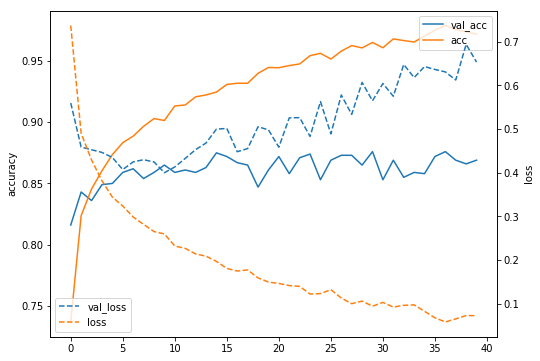

In [51]:
fig, ax1 =plt.subplots(figsize = (8,6))
color ='tab:red'
ax1.plot(pd1.val_acc, label ='val_acc', color='C0')
ax1.plot(pd1.acc, label ='acc', color ='C1')
ax1.set_ylabel('accuracy')
ax1.legend(loc=1)

ax2 = ax1.twinx()

ax2.plot(pd1.val_loss, label ='val_loss',color='C0',linestyle='--')
ax2.plot(pd1.loss, label ='loss',color ='C1',linestyle='--')
ax2.set_ylabel('loss')
ax2.legend(loc =0)

### Model using drop-out

In [52]:
model2_2 = Sequential()
model2_2.add(Flatten(input_shape=(28,28)))
model2_2.add(Dense(units =256, activation='relu'))
model2_2.add(Dropout(0.5))
model2_2.add(Dense(units =256, activation='relu'))
model2_2.add(Dropout(0.5))
model2_2.add(Dense(10, activation='softmax'))

model2_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_151 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_152 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_153 (Dense)            (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the model
model2_2.compile(loss = 'categorical_crossentropy',
                optimizer ='adam',
                metrics =['accuracy'])

In [54]:
# fit the model
model2_2_re = model2_2.fit(X_train_data, y_train_data, epochs=50,validation_split =0.1, verbose =1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 4s 444us/step - loss: 1.0125 - acc: 0.6306 - val_loss: 0.5841 - val_acc: 0.7710
Epoch 2/50
9000/9000 [==============================] - 1s 154us/step - loss: 0.6903 - acc: 0.7483 - val_loss: 0.5149 - val_acc: 0.8170
Epoch 3/50
9000/9000 [==============================] - 1s 150us/step - loss: 0.6095 - acc: 0.7773 - val_loss: 0.4913 - val_acc: 0.8310
Epoch 4/50
9000/9000 [==============================] - 1s 149us/step - loss: 0.5655 - acc: 0.7947 - val_loss: 0.4798 - val_acc: 0.8280
Epoch 5/50
9000/9000 [==============================] - 1s 138us/step - loss: 0.5350 - acc: 0.8019 - val_loss: 0.4418 - val_acc: 0.8400
Epoch 6/50
9000/9000 [==============================] - 1s 132us/step - loss: 0.5123 - acc: 0.8094 - val_loss: 0.4313 - val_acc: 0.8440
Epoch 7/50
9000/9000 [==============================] - 1s 132us/step - loss: 0.4972 - acc: 0.8172 - val_loss: 0.4285 - val_acc: 0.8320


In [70]:
score = model2_2.evaluate(x_valid, y_valid)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

10000/10000 [==============================] - 1s 55us/step
Test loss: 0.388
Test Accuracy: 0.872


In [0]:
pd2=pd.DataFrame(model2_2_re.history)

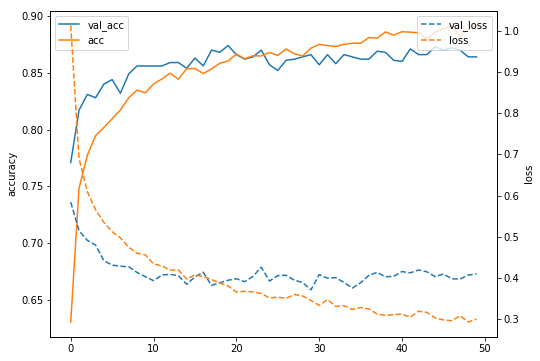

In [57]:
fig, ax1 =plt.subplots(figsize = (8,6))
color ='tab:red'
ax1.plot(pd2.val_acc, label ='val_acc', color='C0')
ax1.plot(pd2.acc, label ='acc', color ='C1')
ax1.set_ylabel('accuracy')
ax1.legend()

ax2 = ax1.twinx()

ax2.plot(pd2.val_loss, label ='val_loss',color='C0',linestyle='--')
ax2.plot(pd2.loss, label ='loss',color ='C1',linestyle='--')
ax2.set_ylabel('loss')
ax2.legend(loc =0)

### model using batch normalization and residual connections

In [0]:
from keras.layers import BatchNormalization
from keras.layers import Input
from keras.models import Model

In [59]:
inputs = Input(shape=(28,28))

x = Flatten()(inputs)
x = Dense(units =256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(units =256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
predictions = Dense(10, activation='softmax')(x)

model2_3 = Model(inputs =inputs, output =predictions)

model2_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_154 (Dense)            (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_139 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_155 (Dense)            (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [0]:
model2_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
model2_3_re = model2_3.fit(X_train_data, y_train_data, batch_size =64, epochs=50,validation_split =0.1, verbose =1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 4s 440us/step - loss: 0.6035 - acc: 0.7881 - val_loss: 0.4515 - val_acc: 0.8470
Epoch 2/50
9000/9000 [==============================] - 1s 102us/step - loss: 0.3989 - acc: 0.8527 - val_loss: 0.4219 - val_acc: 0.8490
Epoch 3/50
9000/9000 [==============================] - 1s 102us/step - loss: 0.3404 - acc: 0.8759 - val_loss: 0.5340 - val_acc: 0.8000
Epoch 4/50
9000/9000 [==============================] - 1s 102us/step - loss: 0.3032 - acc: 0.8898 - val_loss: 0.4146 - val_acc: 0.8550
Epoch 5/50
9000/9000 [==============================] - 1s 103us/step - loss: 0.2617 - acc: 0.9017 - val_loss: 0.4457 - val_acc: 0.8340
Epoch 6/50
9000/9000 [==============================] - 1s 103us/step - loss: 0.2198 - acc: 0.9182 - val_loss: 0.4445 - val_acc: 0.8500
Epoch 7/50
9000/9000 [==============================] - 1s 103us/step - loss: 0.2030 - acc: 0.9241 - val_loss: 0.4620 - val_acc: 0.8520


In [71]:
score = model2_3.evaluate(x_valid, y_valid)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

10000/10000 [==============================] - 1s 65us/step
Test loss: 0.728
Test Accuracy: 0.857


In [0]:
pd3 =pd.DataFrame(model2_3_re.history)

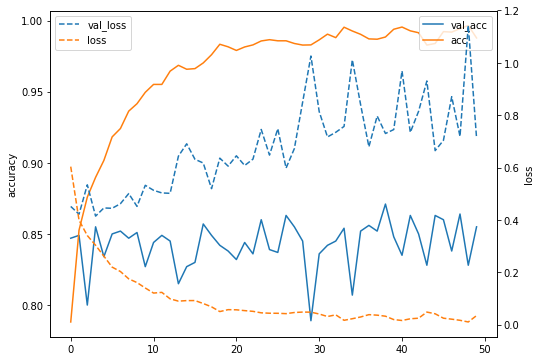

In [64]:
fig, ax1 =plt.subplots(figsize = (8,6))
color ='tab:red'
ax1.plot(pd3.val_acc, label ='val_acc', color='C0')
ax1.plot(pd3.acc, label ='acc', color ='C1')
ax1.set_ylabel('accuracy')
ax1.legend(loc=1)

ax2 = ax1.twinx()

ax2.plot(pd3.val_loss, label ='val_loss',color='C0',linestyle='--')
ax2.plot(pd3.loss, label ='loss',color ='C1',linestyle='--')
ax2.set_ylabel('loss')
ax2.legend(loc =0)


## Task 3

### Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, \
BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, \
GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler, OneHotEncoder, scale
from sklearn.model_selection import train_test_split
import os
from glob import glob
import fnmatch
import random
import seaborn as sns
import cv2
from scipy.misc.pilutil import imresize, imread
from keras.initializers import glorot_uniform

Using TensorFlow backend.


### Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!cp drive/'My Drive'/breast-histopathology-images.zip .
from zipfile import ZipFile
file_name = 'breast-histopathology-images.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
file_name = 'IDC_regular_ps50_idx5.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall('IDC_regular_ps50_idx5')
  print('Done')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Done
Done


In [0]:
image_directories = glob('IDC_regular_ps50_idx5/**/*.png', recursive=True)
class_negative = fnmatch.filter(image_directories, '*class0.png')
class_positive = fnmatch.filter(image_directories, '*class1.png')

In [0]:
class_negative_20000 = random.sample(class_negative, 20000)
class_positive_20000 = random.sample(class_positive, 20000)
class_negative_500 = random.sample(class_negative, 500)
class_positive_500 = random.sample(class_positive, 500)

In [0]:
X = []
y = []
for img in class_negative_20000:
    temp = cv2.imread(img)
    X.append(cv2.resize(temp, (50, 50), interpolation=cv2.INTER_CUBIC))
    y.append(0)
for img in class_positive_20000:
    temp = cv2.imread(img)
    X.append(cv2.resize(temp, (50, 50), interpolation=cv2.INTER_CUBIC))
    y.append(1)
X = np.array(X)/255.0

In [0]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, 
                                  test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, 
                                  test_size=0.2)

In [0]:
y_train = keras.utils.to_categorical(y_train, 2)
y_val = keras.utils.to_categorical(y_val, 2)
y_test = keras.utils.to_categorical(y_test, 2)

### 3.1

The baseline accuracy is around 81.5%. Adding batch normalization while keeping others the same doesn't help, indicating low internal convariance shift between the layers. 

In [83]:
## no batch normalization
model_0 = Sequential()
model_0.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(50, 50, 3)))
model_0.add(MaxPooling2D(pool_size=(2, 2)))
model_0.add(Dropout(0.25))
model_0.add(Conv2D(32, (3, 3), activation='relu'))
model_0.add(MaxPooling2D(pool_size=(2, 2)))
model_0.add(Dropout(0.25))
model_0.add(Flatten())
model_0.add(Dense(64, activation='relu'))
model_0.add(Dense(2, activation='softmax'))
model_0.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
model_0_fit =model_0.fit(X_train, y_train,
                      epochs=30, verbose=0, 
                      validation_data = [X_val, y_val])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [84]:
model_0.evaluate(X_val, y_val)

6400/6400 [==============================] - 1s 109us/step


[0.4731929735094309, 0.81375]

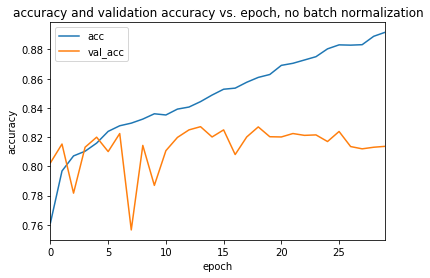

In [85]:
df = pd.DataFrame(model_0_fit.history)
df[['acc', 'val_acc']].plot()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("accuracy and validation accuracy vs. epoch, no batch normalization")
plt.show()

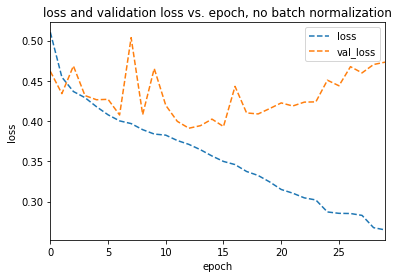

In [86]:
df[['loss', 'val_loss']].plot(linestyle='--')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("loss and validation loss vs. epoch, no batch normalization")
plt.show()

In [87]:
model_0.evaluate(X_test, y_test)

8000/8000 [==============================] - 1s 115us/step


[0.46270858246088026, 0.817875]

In [15]:
## batch normalization
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(50, 50, 3)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(32, (3, 3), activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
model_1_fit = model_1.fit(X_train, y_train,
                      epochs=50, verbose=0, 
                      validation_data = [X_val, y_val])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model_1.evaluate(X_val, y_val)

6400/6400 [==============================] - 1s 101us/step


[0.9712744136154652, 0.72765625]

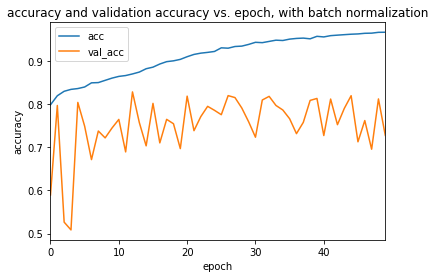

In [17]:
df = pd.DataFrame(model_1_fit.history)
df[['acc', 'val_acc']].plot()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("accuracy and validation accuracy vs. epoch, \
with batch normalization")
plt.show()

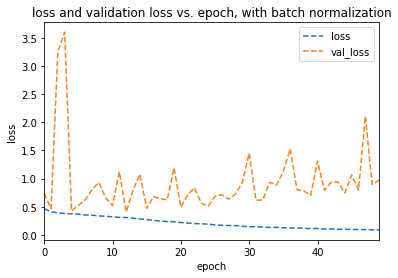

In [18]:
df[['loss', 'val_loss']].plot(linestyle='--')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("loss and validation loss vs. epoch, with batch normalization")
plt.show()

In [19]:
model_1.evaluate(X_test, y_test)

8000/8000 [==============================] - 1s 102us/step


[0.9093877783417702, 0.744375]

### 3.2

A model with data augmentation achieved an accuracy of around 84.5% on validation and test set, an increase by 3% compared to the baseline reported in 3.1. Moreover, the validation curves fit closer to the test curves in both plots, implying less overfit.

In [0]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

In [9]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(50, 50, 3)))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(2, activation='softmax'))
model_2.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
model_2_fit = model_2.fit_generator(datagen.flow(X_train, y_train),
                    steps_per_epoch=len(X_train)/32, epochs=30, 
                                      validation_data = [X_val, y_val],
                                      verbose = 0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [10]:
model_2.evaluate(X_val, y_val)

6400/6400 [==============================] - 1s 99us/step


[0.367712414637208, 0.84453125]

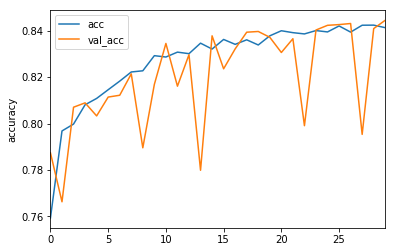

In [11]:
df = pd.DataFrame(model_2_fit.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
plt.show()

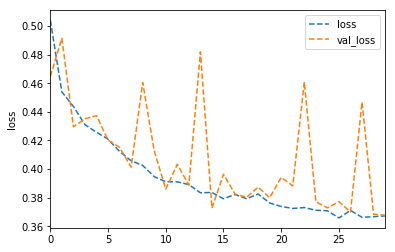

In [12]:
df[['loss', 'val_loss']].plot(linestyle='--')
plt.ylabel("loss")
plt.show()

In [13]:
model_2.evaluate(X_test, y_test)

8000/8000 [==============================] - 1s 103us/step


[0.35575688165426256, 0.84675]

### 3.3

The model with and without residual connections, as shown below, could both learn. A research on this issue showed that the potential problem is due to the fact that the model is not deep enough, therefore with or without residual connection doesn't affect whether the model could learn. Furthermore, a model without residual connections achieves better accuracy. 

In [0]:
## https://github.com/AdalbertoCq/Deep-Learning-Specialization-Coursera/blob/
## master/Convolutional%20Neural%20Networks/week2/ResNet/residual_networks.py
def identity_block(X, f, filters, stage, block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
    X_shortcut = X
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), \
               padding='valid', name=conv_name_base + '2a', \
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), \
               padding='same', name=conv_name_base + '2b', \
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), \
               padding='valid', name=conv_name_base + '2c', \
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    return X

def convolutional_block(X, f, filters, stage, block, s=2):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
    X_shortcut = X
    X = Conv2D(F1, (1, 1), strides=(s, s), name=conv_name_base + '2a', \
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), \
               padding='same', name=conv_name_base + '2b', \
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), \
               padding='valid', name=conv_name_base + '2c', \
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)
    X_shortcut = Conv2D(F3, (1, 1), strides=(s, s), \
                        name=conv_name_base + '1', kernel_initializer=\
                        glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, \
                                    name=bn_name_base + '1')(X_shortcut)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    return X

def ResNet50(input_shape=(50, 50, 3), classes=2):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(32, (3, 3), strides=(2, 2), name='conv1', \
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = convolutional_block(X, f=3, filters=[64, 64, 256], \
                            stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    X = AveragePooling2D((2, 2), name='avg_pool')(X)
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + \
              str(classes), kernel_initializer=glorot_uniform(seed=0))(X)
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    return model

def Net50(input_shape=(50, 50, 3), classes=2):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(32, (3, 3), strides=(2, 2), name='conv1', \
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = convolutional_block(X, f=3, filters=[64, 64, 256], \
                            stage=2, block='a', s=1)
    X = AveragePooling2D((2, 2), name='avg_pool')(X)
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + \
              str(classes), kernel_initializer=glorot_uniform(seed=0))(X)
    model = Model(inputs=X_input, outputs=X, name='Net50')
    return model

In [0]:
## Model with residual connections
model_3 = ResNet50()
model_3.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
model_3_fit = model_3.fit_generator(datagen.flow(X_train, y_train),
                    steps_per_epoch=len(X_train)/32, epochs=20, 
                                      validation_data = [X_val, y_val],
                                      verbose = 0)

In [60]:
model_3.evaluate(X_val, y_val)

6400/6400 [==============================] - 2s 364us/step


[0.5175555722042918, 0.78171875]

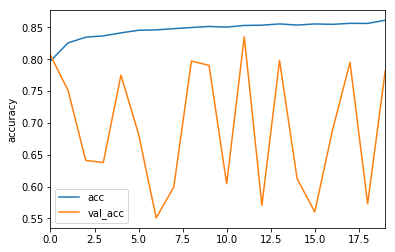

In [61]:
df = pd.DataFrame(model_3_fit.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
plt.show()

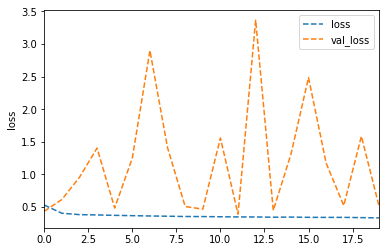

In [62]:
df[['loss', 'val_loss']].plot(linestyle='--')
plt.ylabel("loss")
plt.show()

In [63]:
model_3.evaluate(X_test, y_test)

8000/8000 [==============================] - 3s 341us/step


[0.4929803496003151, 0.79]

In [ ]:
## Model without residual connections
model_4 = Net50()
model_4.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
model_4_fit = model_4.fit_generator(datagen.flow(X_train, y_train),
                    steps_per_epoch=len(X_train)/32, epochs=20, 
                                      validation_data = [X_val, y_val],
                                      verbose = 0)

In [23]:
model_4.evaluate(X_val, y_val)

6400/6400 [==============================] - 1s 176us/step


[0.3866707129403949, 0.8459375]

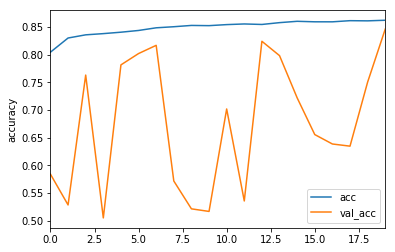

In [24]:
df = pd.DataFrame(model_4_fit.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
plt.show()

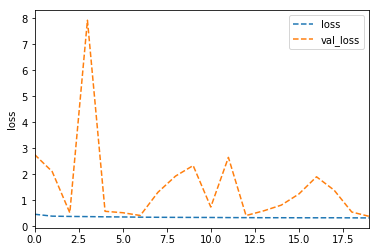

In [25]:
df[['loss', 'val_loss']].plot(linestyle='--')
plt.ylabel("loss")
plt.show()

In [26]:
model_4.evaluate(X_test, y_test)

8000/8000 [==============================] - 2s 193us/step


[0.38411634707450865, 0.8425]